# Name:G.Dheekshith Kumar
# Task - 3
# Car Price Predication with Machine Learning

## Importing the libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
df = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\CarPrice_Assignment.csv")
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

## Exploring the data

In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.select_dtypes(include='object').columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [7]:
df.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df = df.drop(columns='CarName')

In [11]:
df.head()

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0          front       88.6      168.8  ...         130        mpfi   
1          front       88.6      168.8  ...         130        mpfi   
2          front       94.5      171.2  ...         152        mpfi   
3          front       99.8      176.6  ...         109        mpfi   
4          front       99.4      176.6  ...         136        mpfi   

   boreratio stroke compressionratio  horsepower peakrpm  citympg  highwaympg  \
0       3.47   2.68              9.0         111    5000       21          27   
1       3.47   2.68              9.0         111    5000       21          27   
2       2.68   3.47              9.0         154    5000       19          26   
3       3.19   3.40             10.0         102    5500       24          30   
4       3.19   3.40              8.0         115    5500       18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 25 columns]

In [12]:
print(df['fueltype'].value_counts())
print(df['carbody'].value_counts())
print(df['drivewheel'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [13]:
fuel_type=df['fueltype']
Price=df['price']
Car_body=df['carbody']
fuel_system=df['fuelsystem']

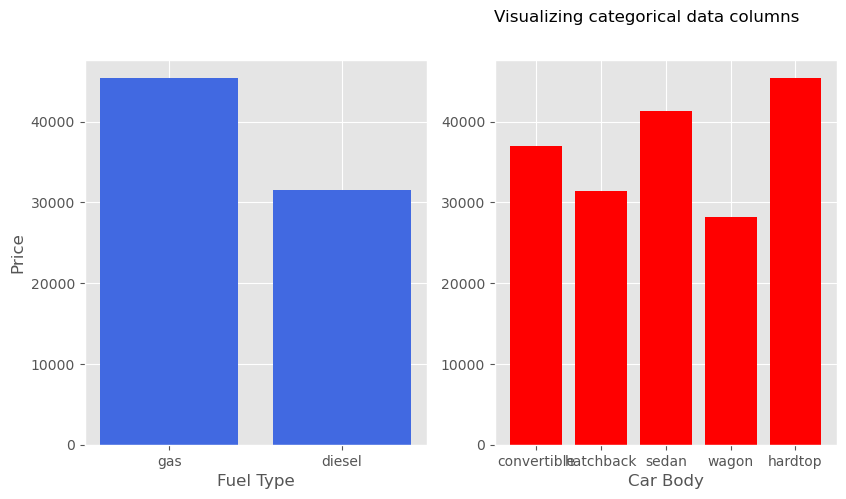

In [14]:
#univariate analysis
#barplot
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,Price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.subplot(1,3,2)
plt.bar(Car_body,Price, color='red')
plt.xlabel("Car Body")
plt.show()

<Axes: xlabel='carbody', ylabel='price'>

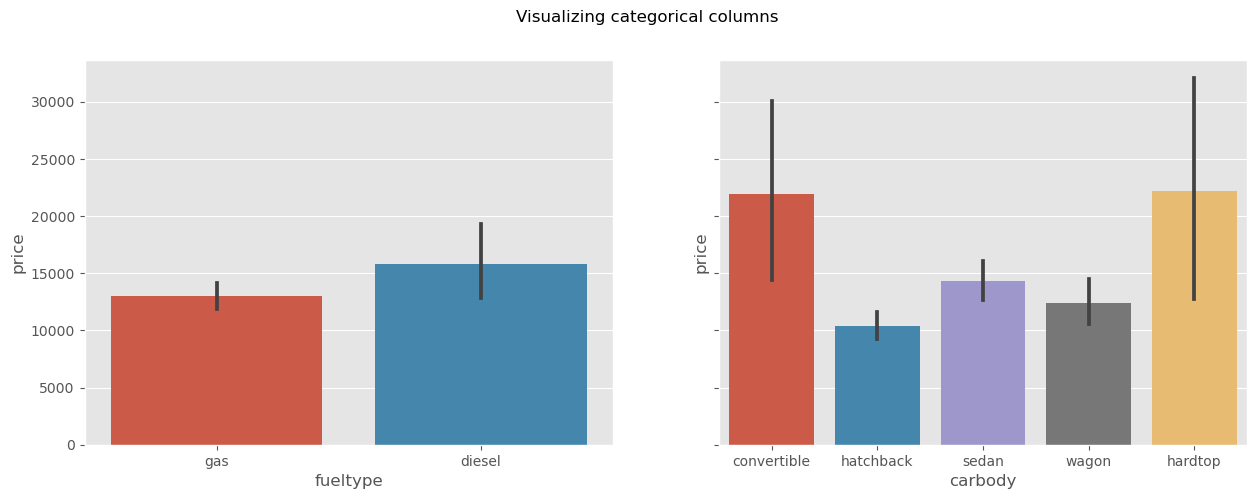

In [15]:
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type,y=Price,ax=axes[0])
sns.barplot(x=Car_body,y=Price,ax=axes[1])

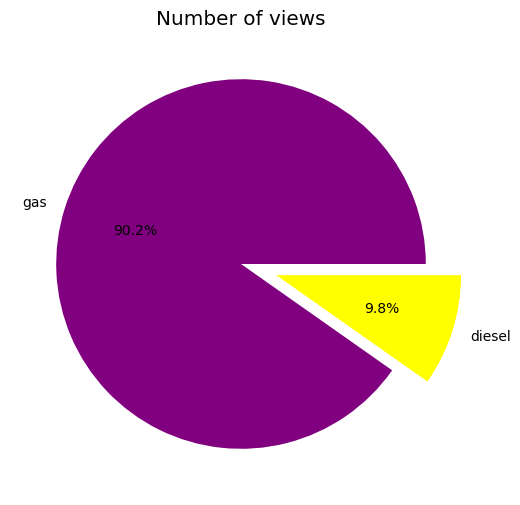

In [16]:
plt.figure(figsize=(8, 6))
plt.pie((df['fueltype']).value_counts(),[0,0.2],labels = ['gas','diesel'],autopct ='%1.1f%%',shadow = False,colors = ['purple','yellow'],)
plt.title('Number of views')
plt.show()

<Axes: xlabel='wheelbase', ylabel='carlength'>

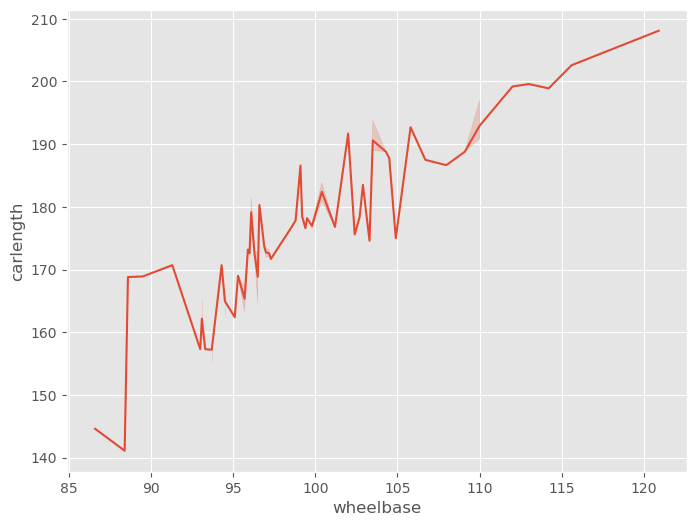

In [17]:
#bivariate analysis
#lineplot
plt.figure(figsize=(8, 6))
sns.lineplot(x = df['wheelbase'],y=df['carlength'])

<Axes: xlabel='enginesize', ylabel='horsepower'>

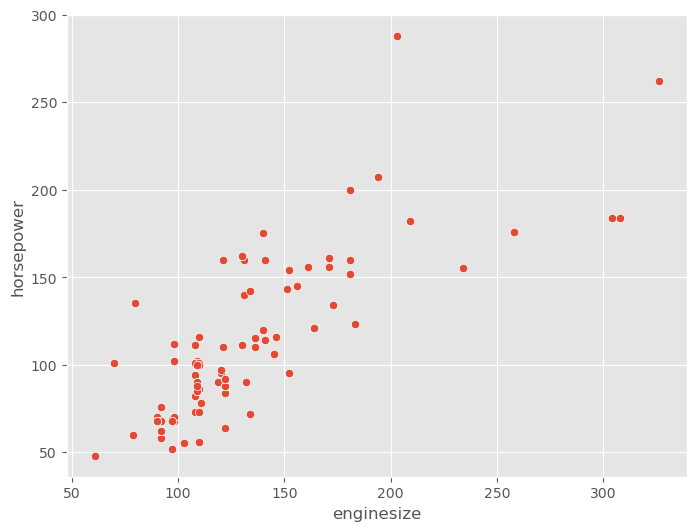

In [18]:
#scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['enginesize'],y=df['horsepower'])

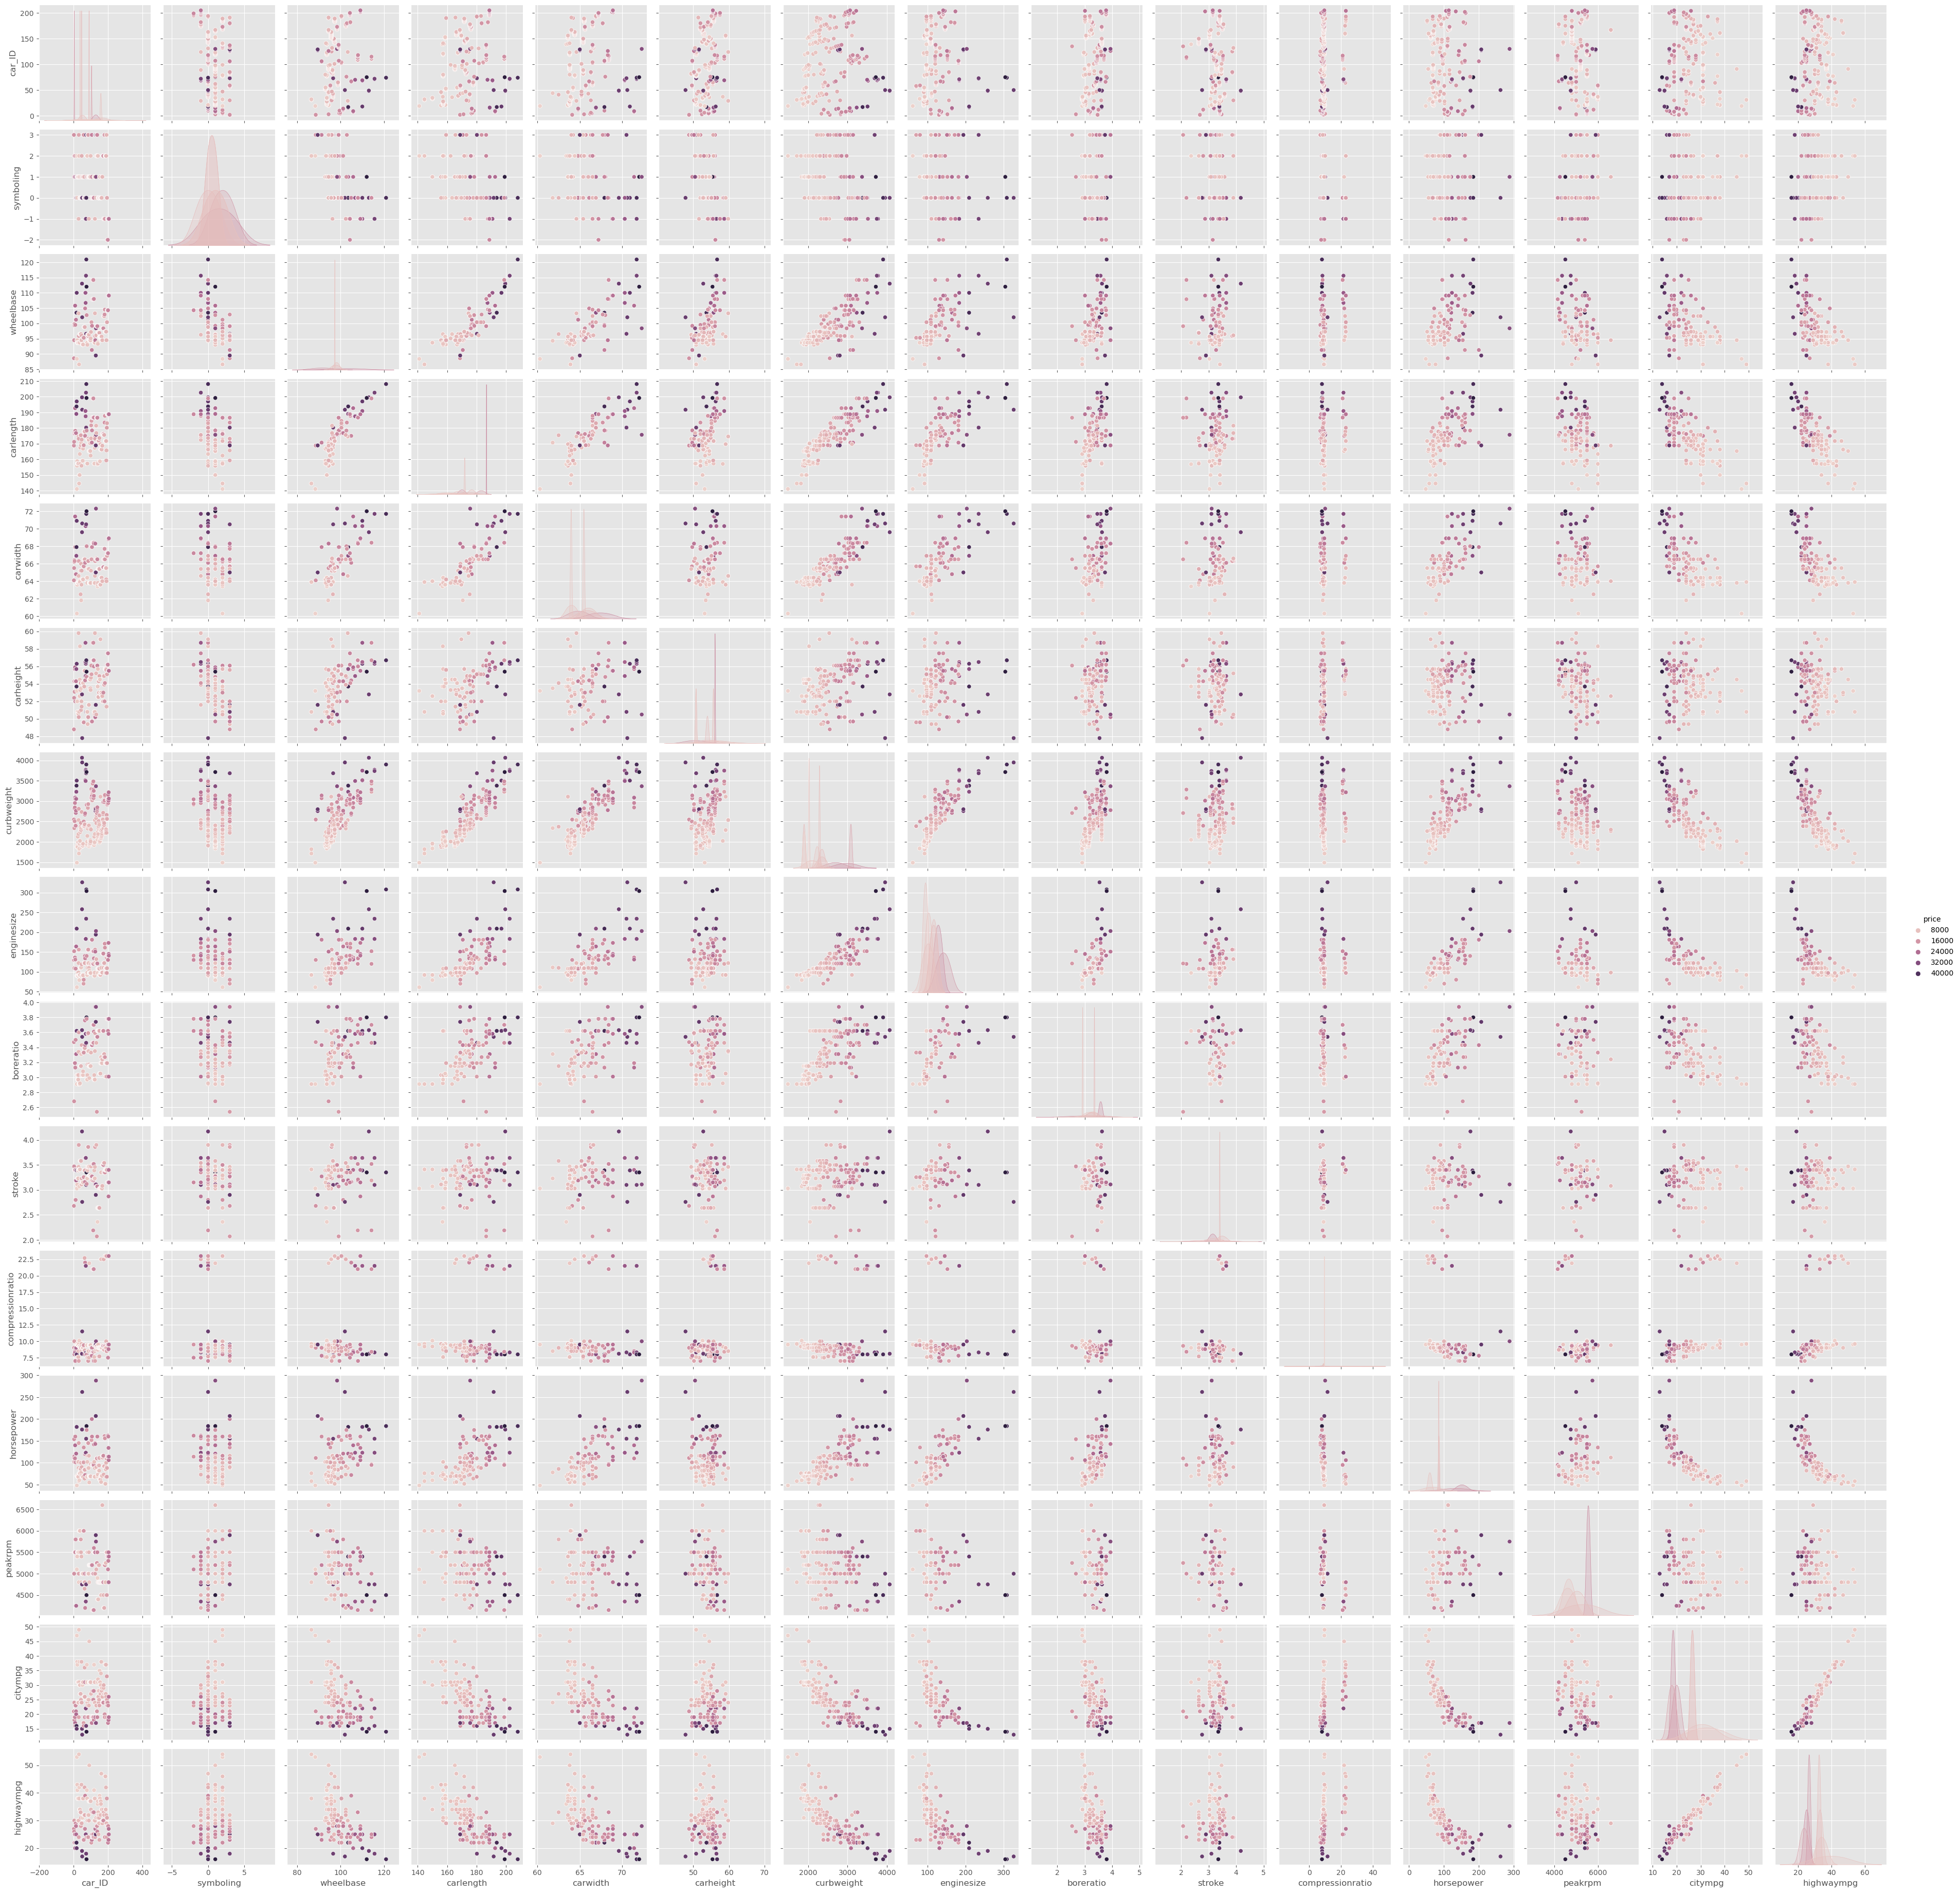

In [19]:
#pairplot
sns.pairplot(df, hue="price")
# Show the plot
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20368\1087955420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

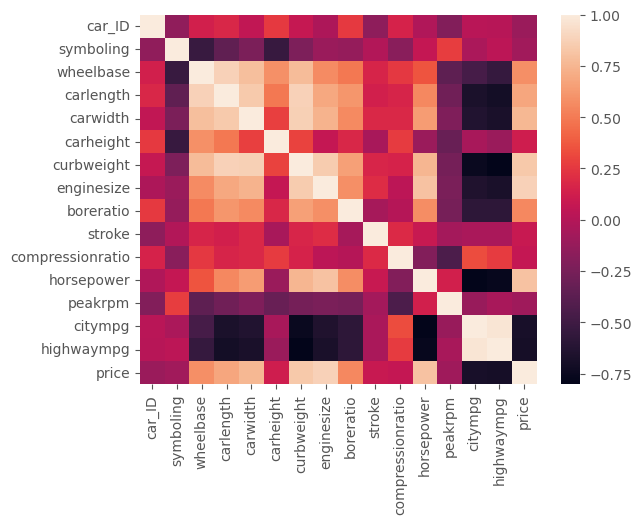

In [20]:
#heatmap
sns.heatmap(df.corr())

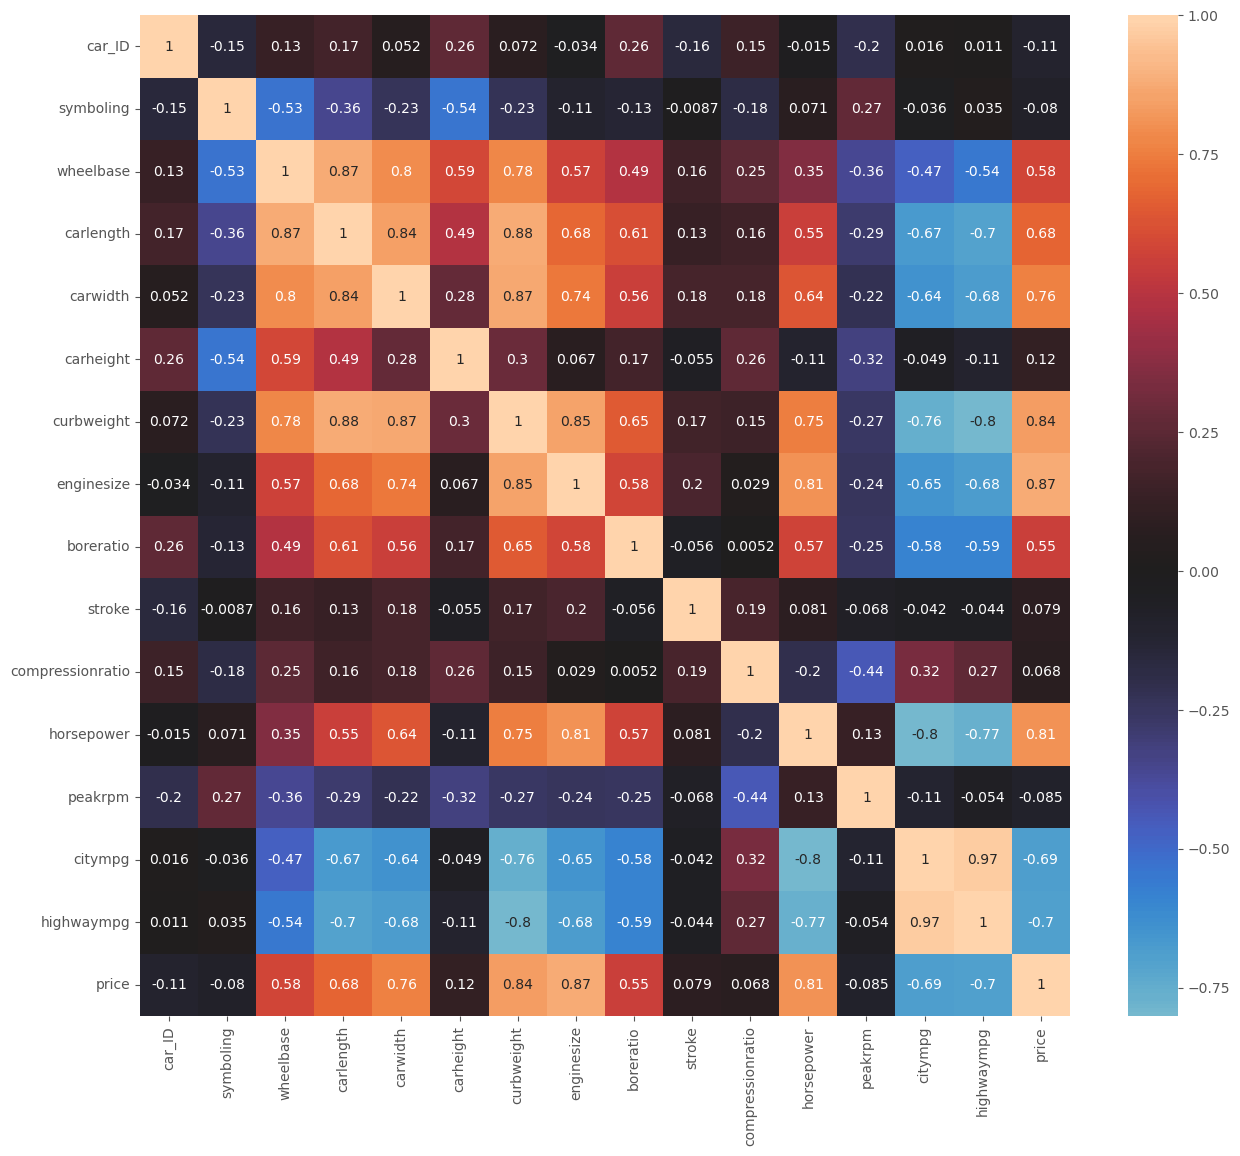

In [21]:
#heat Map
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 13))
heatmap = sns.heatmap(correlation_matrix, annot=True, center=0)
plt.show()

## Label Encoding 

In [22]:
df.select_dtypes(include='object').columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [23]:
#one hot labeling encoding
df = pd.get_dummies(df, drop_first=True)

In [24]:
df.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                     0   
1         130       3.47    2.68  ...                     0   
2         152       2.68    3.47  ...                     0   
3         109       3.19    3.40  ...                     0   
4         136       3.19    3.40  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 45 columns]

In [25]:
x = df.drop(columns='price')
y = df['price']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [27]:
x_train

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
4         5          2       99.4      176.6      66.4       54.3        2824   
71       72         -1      115.6      202.6      71.7       56.5        3740   
134     135          3       99.1      186.6      66.5       56.1        2707   
145     146          0       97.0      172.0      65.4       54.3        2510   
122     123          1       93.7      167.3      63.8       50.8        2191   
..      ...        ...        ...        ...       ...        ...         ...   
67       68         -1      110.0      190.9      70.3       56.5        3515   
192     193          0      100.4      180.2      66.9       55.1        2579   
117     118          0      108.0      186.7      68.3       56.0        3130   
47       48          0      113.0      199.6      69.6       52.8        4066   
172     173          2       98.4      176.2      65.6       53.0        2975   

     enginesize  boreratio  stroke  ...  cylindernumber_three  \
4           136       3.19    3.40  ...                     0   
71          234       3.46    3.10  ...                     0   
134         121       2.54    2.07  ...                     0   
145         108       3.62    2.64  ...                     0   
122          98       2.97    3.23  ...                     0   
..          ...        ...     ...  ...                   ...   
67          183       3.58    3.64  ...                     0   
192          97       3.01    3.40  ...                     0   
117         134       3.61    3.21  ...                     0   
47          258       3.63    4.17  ...                     0   
172         146       3.62    3.50  ...                     0   

     cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
4                        0                   0                0   
71                       0                   0                0   
134                      0                   0                0   
145                      0                   0                0   
122                      0                   0                1   
..                     ...                 ...              ...   
67                       0                   0                0   
192                      0                   0                0   
117                      0                   0                0   
47                       0                   0                0   
172                      0                   0                0   

     fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
4                  0               0               0                1   
71                 0               0               0                1   
134                0               0               0                1   
145                0               0               0                1   
122                0               0               0                0   
..               ...             ...             ...              ...   
67                 0               1               0                0   
192                0               1               0                0   
117                0               0               0                1   
47                 0               0               0                1   
172                0               0               0                1   

     fuelsystem_spdi  fuelsystem_spfi  
4                  0                0  
71                 0                0  
134                0                0  
145                0                0  
122                0                0  
..               ...              ...  
67                 0                0  
192                0                0  
117                0                0  
47                 0                0  
172                0                0  

[164 rows x 44 columns]

In [28]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
80      9959.0
111    15580.0
131     9895.0
171    11549.0
179    15998.0
138     5118.0
156     6938.0
113    16695.0
161     8358.0
89      5499.0
183     7975.0
193    12290.0
125    22018.0
173     8948.0
92      6849.0
16     41315.0
189    11595.0
136    18150.0
22      6377.0
74     45400.0
44      8916.5
Name: price, dtype: float64

In [29]:
y_train

4      17450.0
71     34184.0
134    15040.0
145    11259.0
122     7609.0
        ...   
67     25552.0
192    13845.0
117    18150.0
47     32250.0
172    17669.0
Name: price, Length: 164, dtype: float64

In [30]:
x_test

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
52       53          1       93.1      159.1      64.2       54.1        1905   
181     182         -1      104.5      187.8      66.5       54.1        3151   
5         6          2       99.8      177.3      66.3       53.1        2507   
18       19          2       88.4      141.1      60.3       53.2        1488   
188     189          2       97.3      171.7      65.5       55.7        2300   
170     171          2       98.4      176.2      65.6       52.0        2679   
76       77          2       93.7      157.3      64.4       50.8        1918   
154     155          0       95.7      169.7      63.6       59.1        2290   
104     105          3       91.3      170.7      67.9       49.7        3071   
33       34          1       93.7      150.0      64.0       52.6        1940   
12       13          0      101.2      176.8      64.8       54.3        2710   
129     130          1       98.4      175.7      72.3       50.5        3366   
55       56          3       95.3      169.0      65.7       49.6        2380   
66       67          0      104.9      175.0      66.1       54.4        2700   
45       46          0       94.5      155.9      63.6       52.0        1909   
169     170          2       98.4      176.2      65.6       52.0        2551   
130     131          0       96.1      181.5      66.5       55.2        2579   
7         8          1      105.8      192.7      71.4       55.7        2954   
37       38          0       96.5      167.5      65.2       53.3        2236   
152     153          1       95.7      158.7      63.6       54.5        2015   
80       81          3       96.3      173.0      65.4       49.4        2370   
111     112          0      107.9      186.7      68.4       56.7        3075   
131     132          2       96.1      176.8      66.6       50.5        2460   
171     172          2       98.4      176.2      65.6       52.0        2714   
179     180          3      102.9      183.5      67.7       52.0        3016   
138     139          2       93.7      156.9      63.4       53.7        2050   
156     157          0       95.7      166.3      64.4       53.0        2081   
113     114          0      114.2      198.9      68.4       56.7        3285   
161     162          0       95.7      166.3      64.4       52.8        2122   
89       90          1       94.5      165.3      63.8       54.5        1889   
183     184          2       97.3      171.7      65.5       55.7        2209   
193     194          0      100.4      183.1      66.9       55.1        2563   
125     126          3       94.5      168.9      68.3       50.2        2778   
173     174         -1      102.4      175.6      66.5       54.9        2326   
92       93          1       94.5      165.3      63.8       54.5        1938   
16       17          0      103.5      193.8      67.9       53.7        3380   
189     190          3       94.5      159.3      64.2       55.6        2254   
136     137          3       99.1      186.6      66.5       56.1        2808   
22       23          1       93.7      157.3      63.8       50.8        1876   
74       75          1      112.0      199.2      72.0       55.4        3715   
44       45          1       94.5      155.9      63.6       52.0        1874   

     enginesize  boreratio  stroke  ...  cylindernumber_three  \
52           91       3.03   3.150  ...                     0   
181         161       3.27   3.350  ...                     0   
5           136       3.19   3.400  ...                     0   
18           61       2.91   3.030  ...                     1   
188         109       3.19   3.400  ...                     0   
170         146       3.62   3.500  ...                     0   
76           92       2.97   3.230  ...                     0   
154          92       3.05   3.030  ...                     0   
104         181  

In [31]:
x_train.shape

(164, 44)

In [32]:
x_test.shape

(41, 44)

In [33]:
y_test.shape

(41,)

In [34]:
y_train.shape

(164,)

## Training Model

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor instance
reg = RandomForestRegressor()

# Fit the model to the training data
reg.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [37]:
y_pred = reg.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

89.17930039272767

## Hyperparameter Tuning

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
parameters = {
    'n_estimators' : [100,200,300,400,500,600,700,800,900,1000],
    'criterion' : ['mse','mae'],
    'max_depth' : [None,10,20,30,40,50],
    'min_samples_split' : [2,5,10,20,50],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['sqrt','log2'],
    'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse']
}

In [41]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'criterion': ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20, 50],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_features': ['sqrt', 'log2']}

In [42]:
from sklearn.metrics import mean_absolute_error
# Create RandomizedSearchCV instance
random_cv = RandomizedSearchCV(estimator=reg, param_distributions=parameters, n_iter=10,
                               scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1,error_score='raise')

# Fit the model to the training data using RandomizedSearchCV
random_cv.fit(x_train, y_train)

# Get the best model
best_model = random_cv.best_estimator_

# Make predictions
predictions = best_model.predict(x_test)

# Evaluate the model (for example, using Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Absolute Error: 1915.2538419121108


In [43]:
random_cv.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=50, max_features='log2',
                      min_samples_split=5, n_estimators=900)

## Predicting a Single Observation

In [44]:
df.head()

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                     0   
1         130       3.47    2.68  ...                     0   
2         152       2.68    3.47  ...                     0   
3         109       3.19    3.40  ...                     0   
4         136       3.19    3.40  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                      0                   0                0   
1                      0                   0                0   
2                      0                   0                0   
3                      0                   0                0   
4                      0                   0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 45 columns]

In [45]:
single_obs = x_test.iloc[0:1]

# Predict using the best model
single_prediction = best_model.predict(single_obs)
print("Single Prediction:", single_prediction)

Single Prediction: [6101.21667392]
